In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def load_image(path):
    img = Image.open(path)
    return np.array(img)

In [3]:
def save_image(path, nparr):
    img = Image.fromarray(nparr)
    img.save("./results/"+path)

In [4]:
def plot_compare(*args):
    L = len(args)

    if (L == 0):
        return None
    elif (L == 1):
        f = plt.figure(figsize=(15,15))
        plt.imshow(args[0])
        plt.axis('off')
    else:
        f, axs = plt.subplots(1, L, figsize=(15,15*L))
        for i, ax in enumerate(axs):
            ax.imshow(args[i])
            ax.axis('off')
    plt.show()
    return f 

In [5]:
def convolve_filter(image, FILTER):
    N = len(FILTER)
    resulting_channels = [] 

    channels = np.transpose(image, axes=[2, 0, 1])
    for channel in channels:
        view_shape = tuple(np.subtract(channel.shape, (N,N)) + 1) + (N, N)
        strides = channel.strides + channel.strides
        sub_matrices = np.lib.stride_tricks.as_strided(channel,view_shape,strides)
        filtered = np.einsum('ij,klij',FILTER,sub_matrices)
        result = np.clip(filtered, 0, 255).astype(np.uint8)
        resulting_channels.append(result)

    transposed = np.transpose(np.array(resulting_channels), axes=[1, 2, 0])
    return  np.clip(transposed, 0, 255)

### Item 3

Usando a função da questão 1, pesquise um filtro passa-baixa e aplique-o em 3 imagens distintas, variando o valor de n em 3 unidades em cada imagem. O que acontece quando n cresce?

#### Filters

In [6]:
FILTER_3 = np.ones((3,3)) / (3*3)

FILTER_6 = np.ones((6,6)) / (6*6)

FILTER_9 = np.ones((9,9)) / (9*9)

#### Building

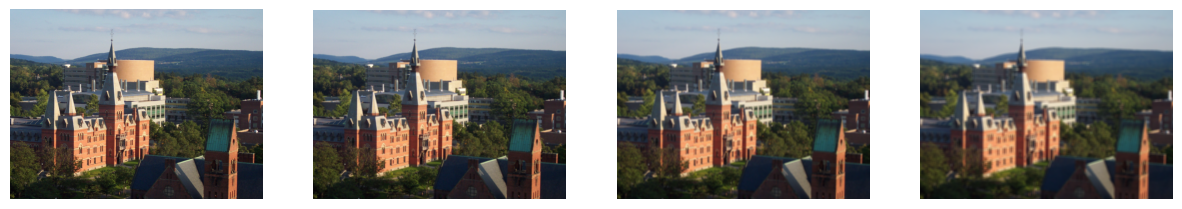

In [7]:
IMAGE = "building"

original = load_image(f"./images/{IMAGE}.ppm")

filtered_3 = convolve_filter(original, FILTER_3)
save_image(f"{IMAGE}_filtered3.ppm", filtered_3)

filtered_6 = convolve_filter(original, FILTER_6)
save_image(f"{IMAGE}_filtered6.ppm", filtered_6)

filtered_9 = convolve_filter(original, FILTER_9)
save_image(f"{IMAGE}_filtered9.ppm", filtered_9)

result = plot_compare(original, filtered_3, filtered_6, filtered_9)
result.savefig(f"./results/{IMAGE}_compare.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

#### Falls

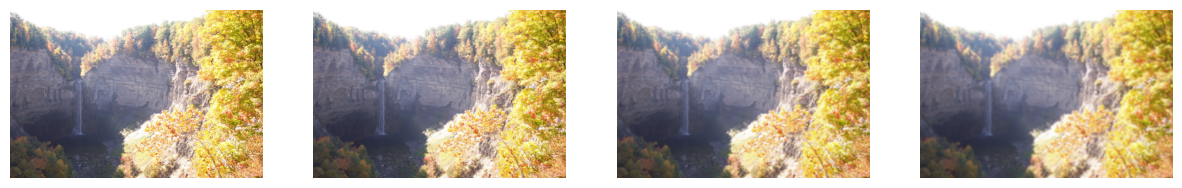

In [8]:
IMAGE = "falls"

original = load_image(f"./images/{IMAGE}.ppm")

filtered_3 = convolve_filter(original, FILTER_3)
save_image(f"{IMAGE}_filtered3.ppm", filtered_3)

filtered_6 = convolve_filter(original, FILTER_6)
save_image(f"{IMAGE}_filtered6.ppm", filtered_6)

filtered_9 = convolve_filter(original, FILTER_9)
save_image(f"{IMAGE}_filtered9.ppm", filtered_9)

result = plot_compare(original, filtered_3, filtered_6, filtered_9)
result.savefig(f"./results/{IMAGE}_compare.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

#### Tree

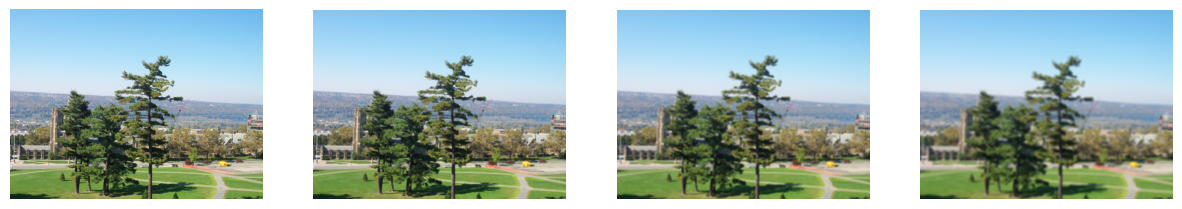

In [9]:
IMAGE = "tree"

original = load_image(f"./images/{IMAGE}.ppm")

filtered_3 = convolve_filter(original, FILTER_3)
save_image(f"{IMAGE}_filtered3.ppm", filtered_3)

filtered_6 = convolve_filter(original, FILTER_6)
save_image(f"{IMAGE}_filtered6.ppm", filtered_6)

filtered_9 = convolve_filter(original, FILTER_9)
save_image(f"{IMAGE}_filtered9.ppm", filtered_9)

result = plot_compare(original, filtered_3, filtered_6, filtered_9)
result.savefig(f"./results/{IMAGE}_compare.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)